### Importing the libraries 

In [1]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')

### Reading the csv file 

In [2]:
df = pd.read_csv('data/stud.csv')

### checking the first 5 rows of the data

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### checking the shape of the data

In [4]:
df.shape

(1000, 8)

## Data checks to perform

- check missing values
- check duplicates
- check datatypes
- check the number of unique values of each column
- check statistics of dataset
- check various categories present in the different categorical column

### check missing values

In [6]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

### There are no missing values in data

### check duplicates

In [7]:
df.duplicated().sum()

np.int64(0)

### There are no duplicate values in the data

### check datatypes

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### check no of unique values

In [9]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### check statistics of dataset

In [10]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### insight

- From above description of numerical data, the mean score for all are very close to each other - between 66 to 68.05
- All standard deviation are also close - between 14.6 -15.19
- The minimum score is 0 for math, but for writing its higher = 10 and is more higher for reading = 17 

### Explore data

In [29]:
print("Categories in 'gender' variable: ", end="")
print(df['gender'].unique())

print("Categories in 'ethnicity' variable: ", end="")
print(df['race_ethnicity'].unique())

print("Categories in 'parental level of education' variable: ", end="")
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable: ", end="")
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable: ", end="")
print(df['test_preparation_course'].unique())

Categories in 'gender' variable: ['female' 'male']
Categories in 'ethnicity' variable: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable: ['standard' 'free/reduced']
Categories in 'test preparation course' variable: ['none' 'completed']


In [24]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [32]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'object']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'object']

print("We have {} numerical features : {}".format(len(numeric_features), numeric_features))
print("We have {} categorical features : {}".format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']
We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [34]:
df['total score'] = df[numeric_features].sum(axis=1)
df['average score'] = df[numeric_features].mean(axis=1)

In [35]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [40]:
reading_full = df[df['reading_score'] == 100]['average score'].count()
writing_full = df[df['writing_score'] == 100]['average score'].count()
math_score = df[df['math_score'] == 100]['average score'].count()

print("Number of students with full score in reading: ", reading_full)
print("Number of students with full score in writing: ", writing_full)
print("Number of students with full score in math: ", math_score)

Number of students with full score in reading:  17
Number of students with full score in writing:  14
Number of students with full score in math:  7


In [42]:
reading_less_20 = df[df['reading_score'] <= 20]['average score'].count()
writing_less_20 = df[df['reading_score'] <= 20]['average score'].count()
math_less_20 = df[df['math_score'] <= 20]['average score'].count()

print("Number of students with less than 21 in reading: ", reading_less_20)
print("Number of students with less than 21 in writing: ", writing_less_20)
print("Number of students with less than 21 in math: ", math_less_20)

Number of students with less than 21 in reading:  1
Number of students with less than 21 in writing:  1
Number of students with less than 21 in math:  4


### Insights

- Students have performed best in reading
- Students have worst performance in math

## Exploring data (Visualization)

Visualize average score distribution to make some conclusion

- histogram
- KDE (kernel distrbution function)

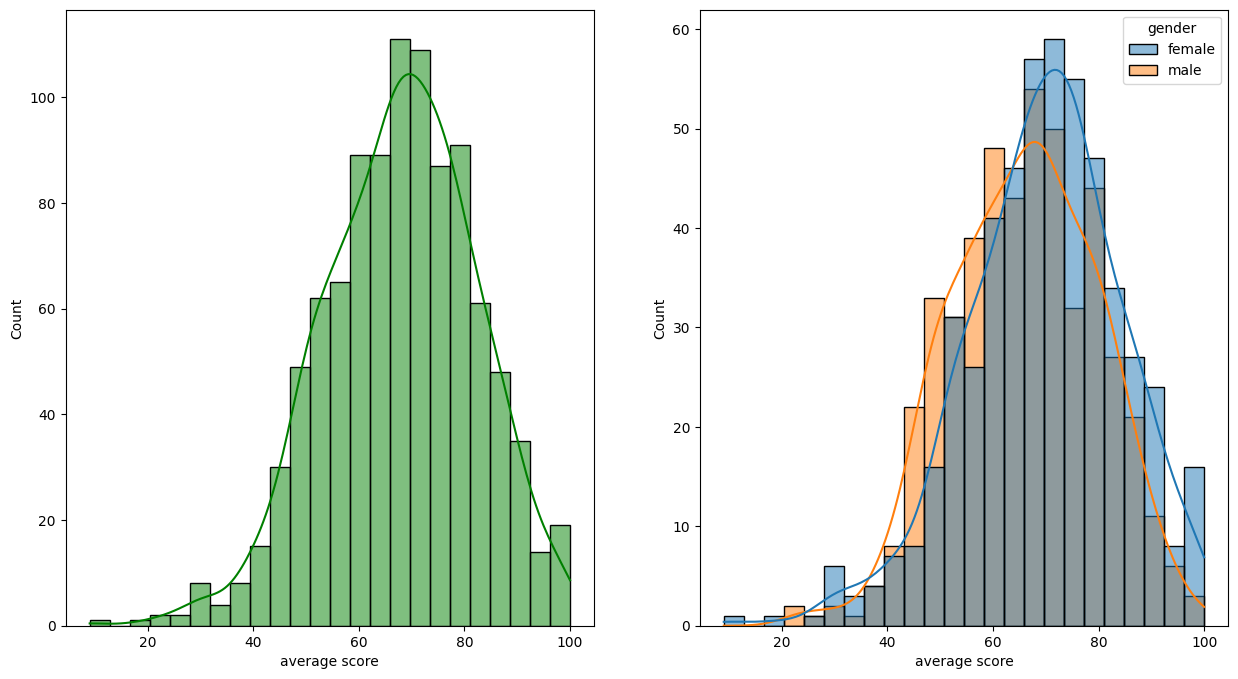

In [50]:
fig, axs = plt.subplots(1, 2, figsize=(15, 8))
plt.subplot(121)
sns.histplot(data=df, x="average score", kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='average score', kde=True, hue='gender')
plt.show()